### This analysis explores the 2015 NYC Street Tree Census dataset to understand patterns in attributes such as tree species distribution, health, and stewardship across the city. By combining map and non-map visualizations, the project highlights where urban forestry efforts are concentrated and identifies potential areas for improvement.

In [40]:
# Import all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import folium

# Set seaborn style
sns.set(style="whitegrid")

In [41]:
# Load the dataset
df = pd.read_csv("../Data/2015_Street_Tree_Census_-_Tree_Data_20250710.csv")

# Show first few rows
df.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [42]:
# Show all columns
print(df.columns)

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')


In [43]:
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           164350 non-null  object 
 11  guards            79866 non-null   object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          225844 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

In [44]:
print("Unique boroughs:")
print(df["borough"].unique())

print("\nUnique species (sample):")
print(df["spc_common"].dropna().unique()[:20])  # show first 20 unique species

print("\nUnique health statuses:")
print(df["health"].dropna().unique())

Unique boroughs:
['Queens' 'Brooklyn' 'Manhattan' 'Staten Island' 'Bronx']

Unique species (sample):
['red maple' 'pin oak' 'honeylocust' 'American linden' 'London planetree'
 'ginkgo' 'willow oak' 'sycamore maple' 'Amur maple' 'hedge maple'
 'American elm' 'ash' 'crab apple' 'silver maple' 'Turkish hazelnut'
 'black cherry' 'eastern redcedar' 'Norway maple' 'tulip-poplar'
 'sawtooth oak']

Unique health statuses:
['Fair' 'Good' 'Poor']


# Number of Trees by Borough

/var/folders/8r/4mpkgt6n7yj48nm3164043fc0000gn/T/ipykernel_92644/2033371683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


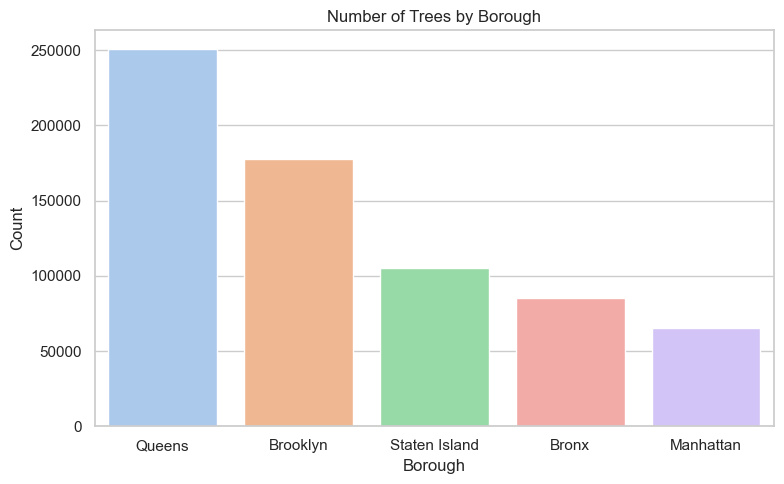

In [67]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df, x="borough", order=df["borough"].value_counts().index, palette="pastel"
)
plt.title("Number of Trees by Borough")
plt.xlabel("Borough")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Top 10 Most Common Tree Species

/var/folders/8r/4mpkgt6n7yj48nm3164043fc0000gn/T/ipykernel_92644/982388289.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_species.values, y=top_species.index, palette="viridis")


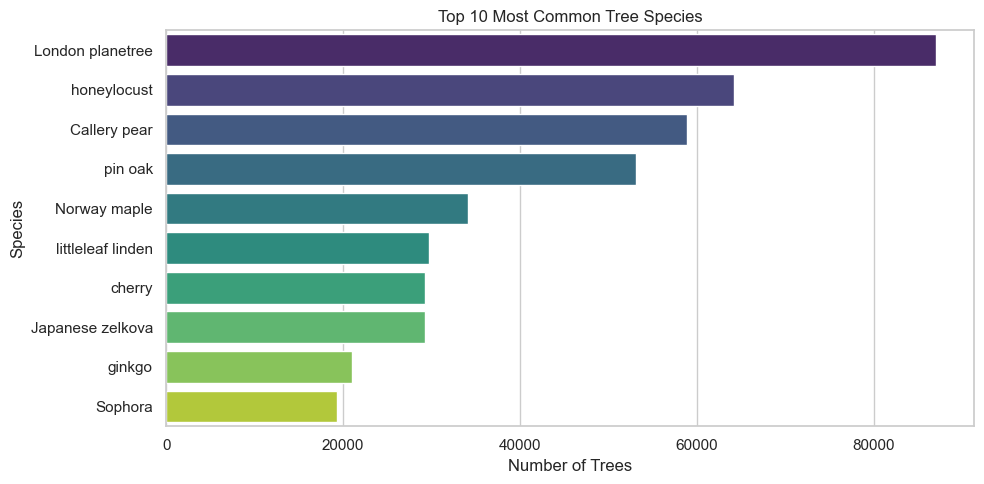

In [68]:
top_species = df["spc_common"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_species.values, y=top_species.index, palette="viridis")
plt.title("Top 10 Most Common Tree Species")
plt.xlabel("Number of Trees")
plt.ylabel("Species")
plt.tight_layout()
plt.show()

/opt/miniconda3/envs/cdp/lib/python3.12/site-packages/geopandas/plotting.py:485: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  ax.figure.canvas.draw_idle()
/opt/miniconda3/envs/cdp/lib/python3.12/site-packages/geopandas/plotting.py:485: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  ax.figure.canvas.draw_idle()
/opt/miniconda3/envs/cdp/lib/python3.12/site-packages/geopandas/plotting.py:485: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  ax.figure.canvas.draw_idle()
/opt/miniconda3/envs/cdp/lib/python3.12/site-packages/geopandas/plotting.py:485: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  ax.figure.canvas.draw_idle()
/opt/miniconda3/envs/cdp/lib/python3.12/site-packages/geopandas/plotting.py:485: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  ax.figure.canvas.draw_idle()
/opt/miniconda3

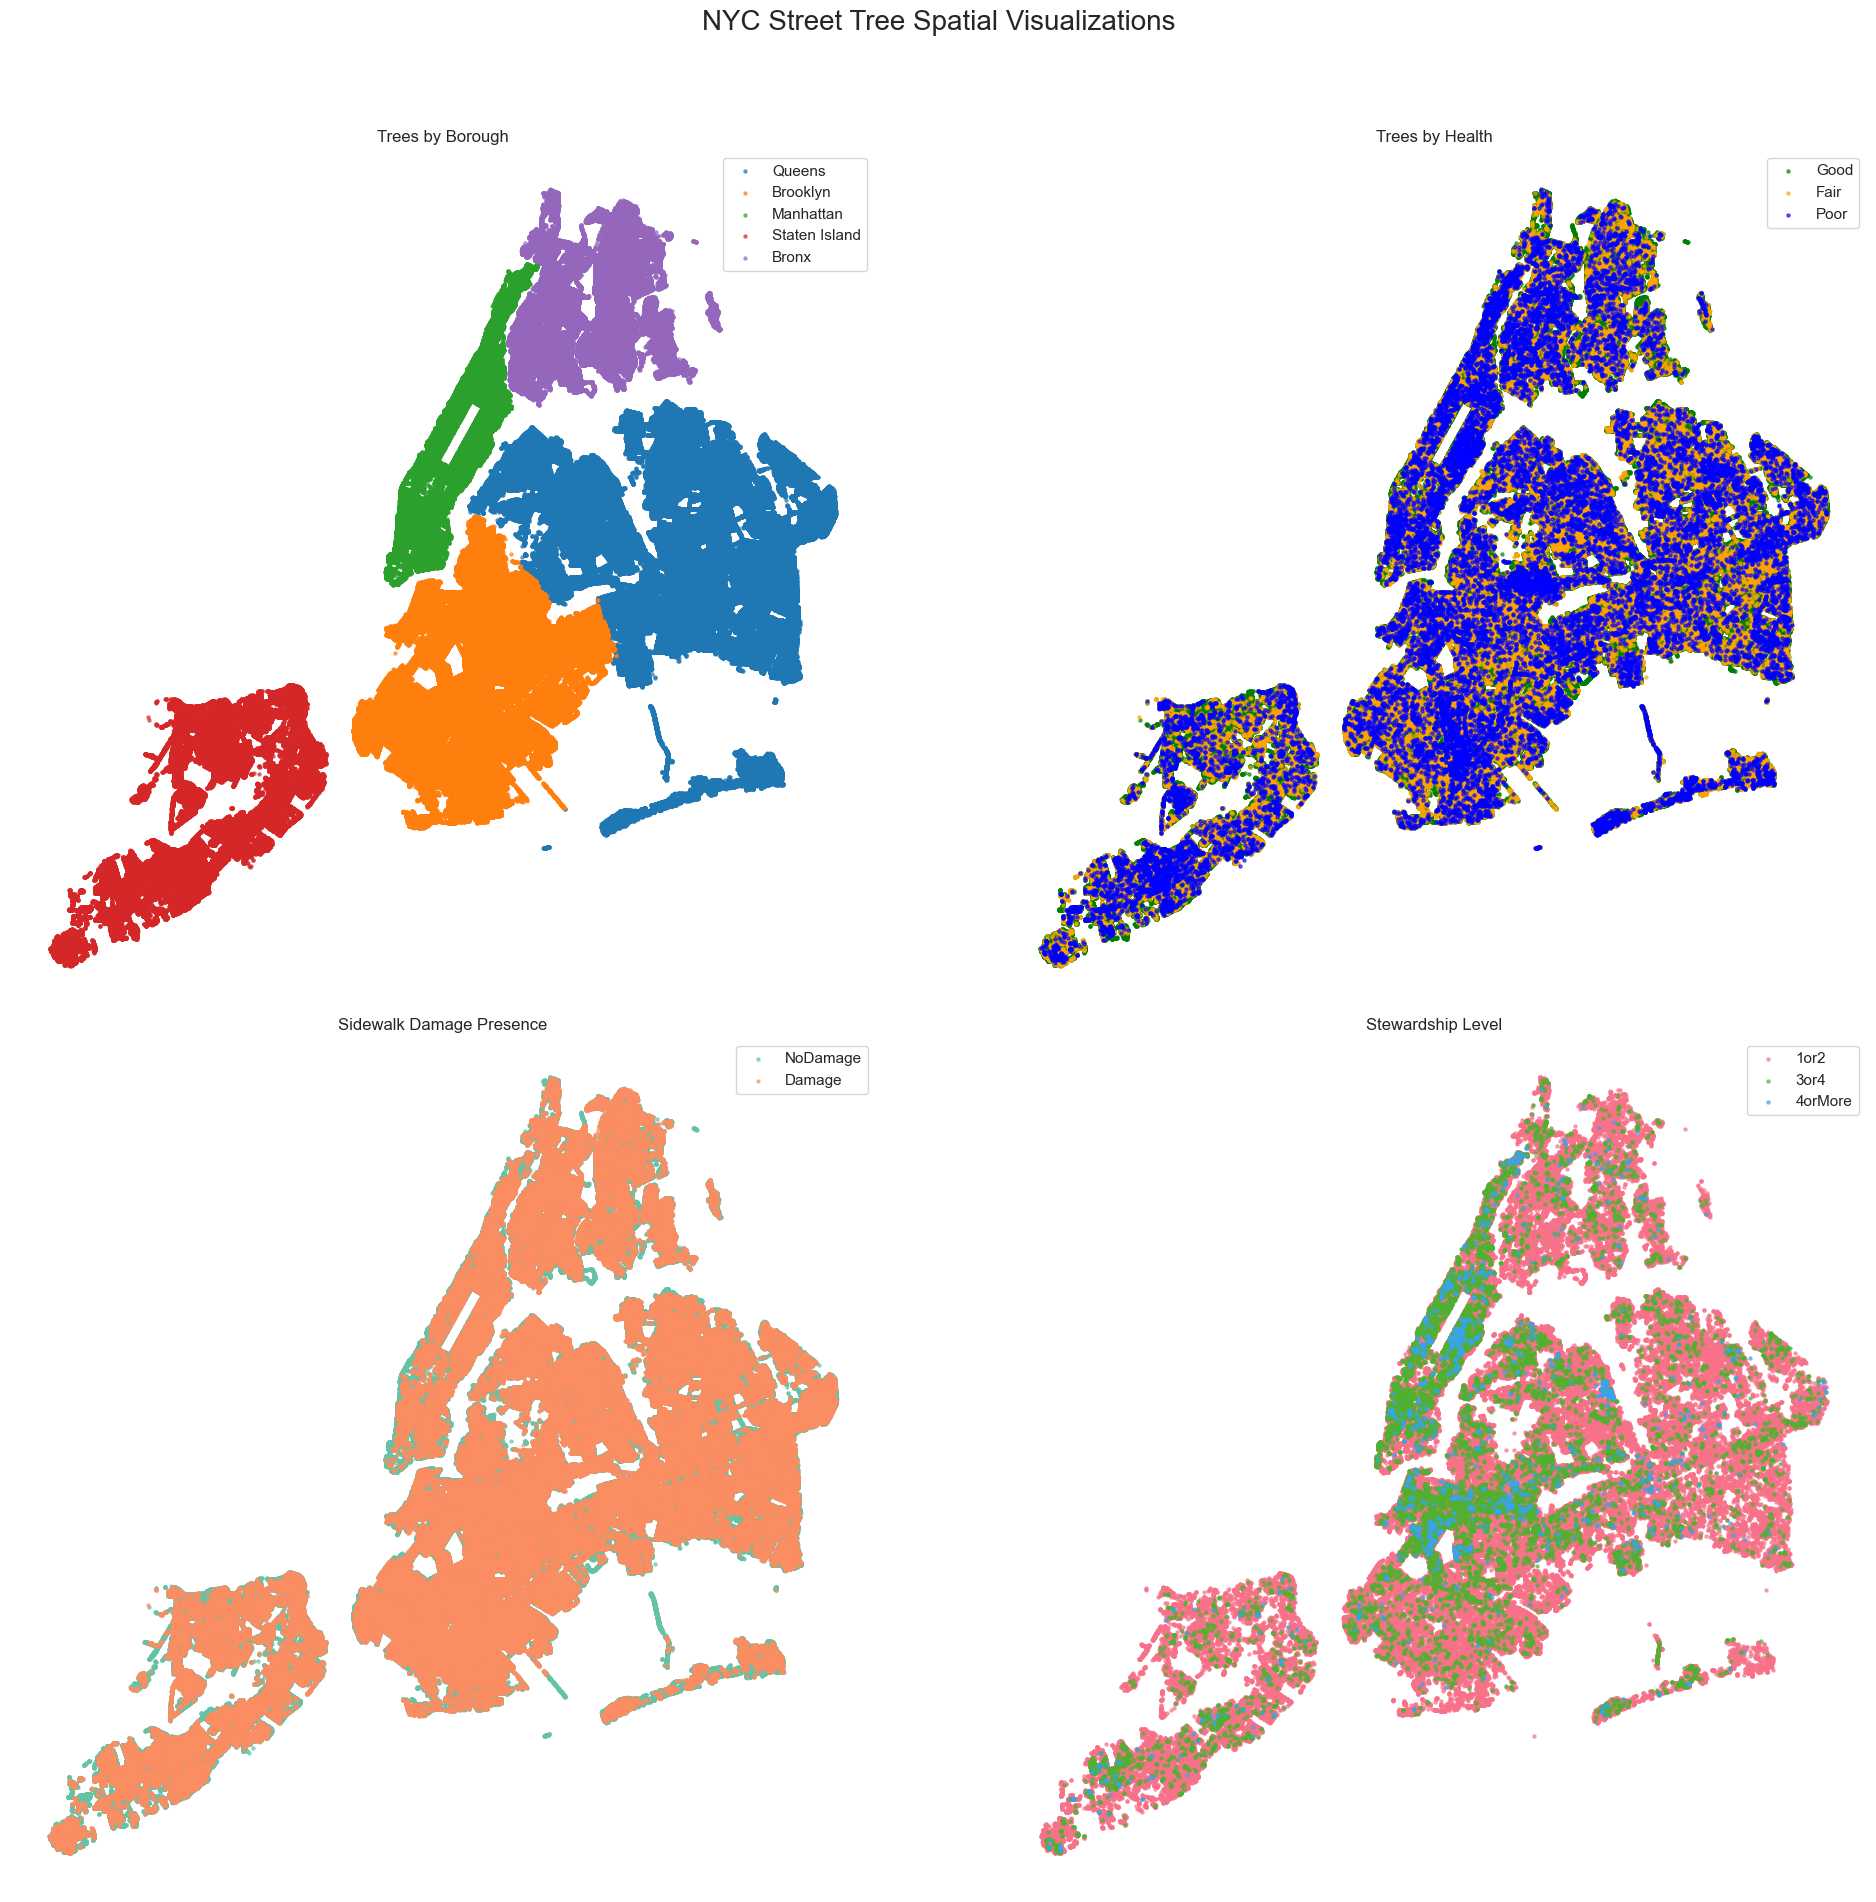

In [69]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
axs = axs.flatten()

# 1. Map by Borough
boroughs = df["borough"].dropna().unique()
palette = sns.color_palette("tab10", len(boroughs))
color_map = dict(zip(boroughs, palette))

for boro, color in color_map.items():
    subset = gdf[gdf["borough"] == boro]
    subset.plot(ax=axs[0], markersize=5, color=color, alpha=0.6, label=boro)
axs[0].set_title("Trees by Borough")
axs[0].axis("off")
axs[0].legend()

# 2. Map by Health
health_map = {"Good": "green", "Fair": "orange", "Poor": "blue"}

for health, color in health_map.items():
    subset = gdf[gdf["health"] == health]
    subset.plot(ax=axs[1], markersize=5, color=color, alpha=0.6, label=health)

axs[1].set_title("Trees by Health")
axs[1].axis("off")
axs[1].legend()

# 3. Map by Sidewalk Condition
sidewalk_states = df["sidewalk"].dropna().unique()
sidewalk_colors = sns.color_palette("Set2", len(sidewalk_states))
sidewalk_map = dict(zip(sidewalk_states, sidewalk_colors))

for sidewalk, color in sidewalk_map.items():
    subset = gdf[gdf["sidewalk"] == sidewalk]
    subset.plot(ax=axs[2], markersize=5, color=color, alpha=0.6, label=sidewalk)
axs[2].set_title("Sidewalk Damage Presence")
axs[2].axis("off")
axs[2].legend()

# 4. Map by Stewardship Level
steward_levels = df["steward"].dropna().unique()
steward_palette = sns.color_palette("husl", len(steward_levels))
steward_map = dict(zip(steward_levels, steward_palette))

for steward, color in steward_map.items():
    subset = gdf[gdf["steward"] == steward]
    subset.plot(ax=axs[3], markersize=5, color=color, alpha=0.6, label=steward)
axs[3].set_title("Stewardship Level")
axs[3].axis("off")
axs[3].legend()

plt.suptitle("NYC Street Tree Spatial Visualizations", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Conclusions: 
- Queens is the borough with most trees
- The 3 most common tree species are london planetree, honeylocust, and callery pear. These are highly tolerant of urban stressors like pollution, road salt, compacted soil, and limited root space. Their resilience, fast growth, and aesthetic appeal have made them ideal choices for street planting across the city.
- A lot of trees are in poor health, with big sidewalk damage presence, which is concerning. Environmental stwardships efforts focus mainly one manhattan and brooklyn. More efforts should take into consideration the other boroughs.
The dataset comes from the 2015 Street Tree Census, so it does not capture more recent plantings, removals, or health changes. As a result, the analysis may not fully reflect the current state of NYC’s trees.